In [1]:
import fipy as fp
from tqdm.notebook import tqdm

def solve_heat_equation(initial_values, t, alpha=1.0, nx=50):
    """
    Solve the heat equation u_t = alpha * u_xx with given initial conditions and 0 boundary conditions on [0, 1].

    Parameters:
    - initial_conditions: A function or array specifying the initial temperature distribution.
    - t: The time at which to evaluate the solution.
    - n_points: Number of grid points in the spatial domain.
    - alpha: The diffusion coefficient.
    - nx: The number of grid points for spatial discretization.

    Returns:
    - The solution at time t (a `CellVariable` object).
    """
    # Step 1: Create the mesh on the domain [0, 1]
    L = 1.0  # Length of the domain
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx)

    # Step 2: Define the variable for temperature (solution to the heat equation)
    temperature = fp.CellVariable(name="Temperature", mesh=mesh)

    # Set initial condition
    temperature.setValue(initial_values)

    # Step 3: Define the equation for the heat equation
    eq = fp.TransientTerm() == alpha * fp.DiffusionTerm(coeff=alpha)

    # Step 4: Set boundary conditions (temperature = 0 at x = 0 and x = 1)
    temperature.constrain(0, where=mesh.facesLeft)   # Boundary condition at x = 0
    temperature.constrain(0, where=mesh.facesRight)  # Boundary condition at x = 1

    # Step 5: Time-stepping loop to solve the equation
    time_step = 0.01  # Define a time step for the simulation
    steps = int(t / time_step)  # Calculate number of steps to reach time t

    for step in tqdm(range(steps), desc="Solving Heat Equation"):
        eq.solve(var=temperature, dt=time_step)

    return temperature

Solving Heat Equation:   0%|          | 0/10 [00:00<?, ?it/s]

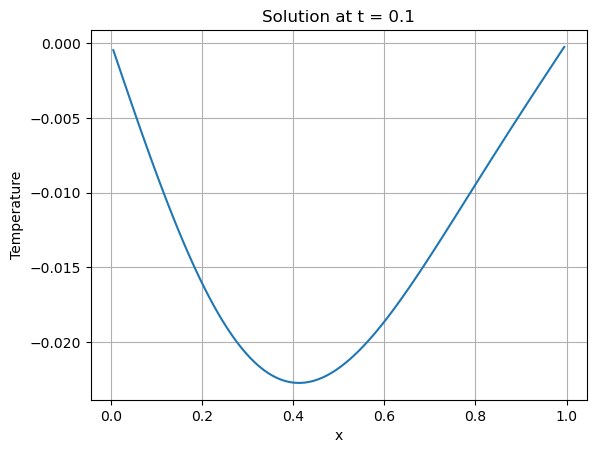

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import fipy as fp


def get_cell_centers(n_points = 50):
    """
    Get the cell center positions for a 1D mesh with the specified number of grid points.

    Parameters:
    - n_points: Number of grid points in the spatial domain.

    Returns:
    - cell_centers: The x-positions of the cell centers.
    """
    L = 1.0  # Length of the domain
    dx = L / n_points

    # Create a 1D mesh
    mesh = fp.Grid1D(nx=n_points, dx=dx)

    # Get the cell center positions
    cell_centers = mesh.cellCenters[0]  # These are the x-positions of the cell centers

    return cell_centers

# Example usage:
n_points = 100
cell_centers = get_cell_centers(n_points)

# Evaluate the sine function at the cell centers
initial_values = cell_centers*(cell_centers**2+cell_centers-1)*(1-cell_centers)

# Call the solve_heat_equation function
time = 0.1
result = solve_heat_equation(initial_values, t=time, nx=n_points)

# Plot the result at time t
plt.plot(result.mesh.cellCenters[0], result.value)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.title(f'Solution at t = {time}')
plt.grid(True)
plt.show()


Solving Heat Equation: 0it [00:00, ?it/s]

Solving Heat Equation:   0%|          | 0/1 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/5 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/10 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/20 [00:00<?, ?it/s]

Solving Heat Equation:   0%|          | 0/50 [00:00<?, ?it/s]

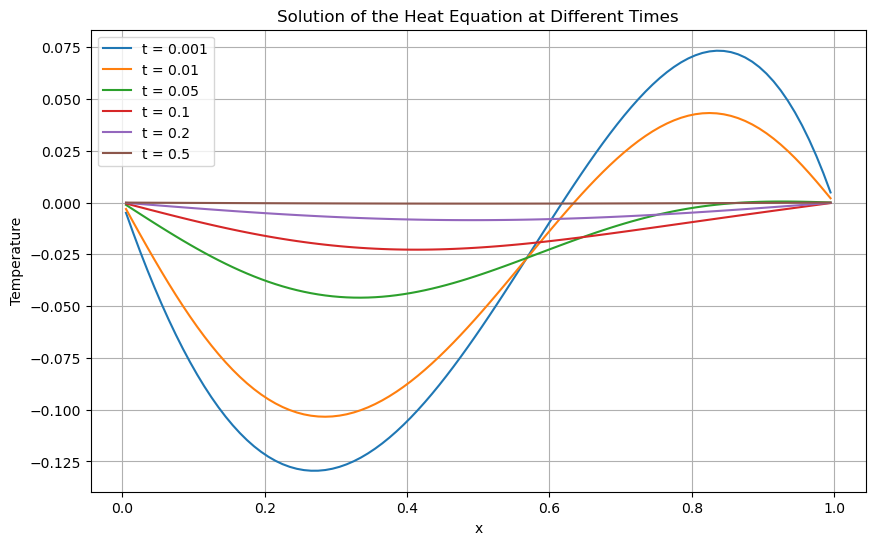

In [3]:
# Define the time values to plot
time_values = [0.001, 0.01, 0.05, 0.1, 0.2, 0.5]

# Plot the results for different time values
plt.figure(figsize=(10, 6))
for time in time_values:
    result = solve_heat_equation(initial_values, t=time, nx=n_points)
    plt.plot(cell_centers, result.value, label=f't = {time}')

plt.xlabel('x')
plt.ylabel('Temperature')
plt.title('Solution of the Heat Equation at Different Times')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import fipy as fp
from tqdm.notebook import tqdm

def solve_heat_equations(initial_values, t, time_step=0.01, alpha=1.0, nx=50):
    """
    Solve the heat equation u_t = alpha * u_xx with given initial conditions and 0 boundary conditions on [0, 1].

    Parameters:
    - initial_conditions: A function or array specifying the initial temperature distribution.
    - t: The time at which to evaluate the solution.
    - n_points: Number of grid points in the spatial domain.
    - alpha: The diffusion coefficient.
    - nx: The number of grid points for spatial discretization.

    Returns:
    - A list of solutions at each time step (each element is a `CellVariable` object).
    """
    # Step 1: Create the mesh on the domain [0, 1]
    L = 1.0  # Length of the domain
    dx = L / nx
    mesh = fp.Grid1D(nx=nx, dx=dx)

    # Step 2: Define the variable for temperature (solution to the heat equation)
    temperature = fp.CellVariable(name="Temperature", mesh=mesh)

    # Set initial condition
    temperature.setValue(initial_values)

    # Step 3: Define the equation for the heat equation
    eq = fp.TransientTerm() == alpha * fp.DiffusionTerm(coeff=alpha)

    # Step 4: Set boundary conditions (temperature = 0 at x = 0 and x = 1)
    temperature.constrain(0, where=mesh.facesLeft)   # Boundary condition at x = 0
    temperature.constrain(0, where=mesh.facesRight)  # Boundary condition at x = 1

    # Step 5: Time-stepping loop to solve the equation
    steps = int(t / time_step)  # Calculate number of steps to reach time t

    # List to store the temperature at each time step
    temperature_history = []

    for step in tqdm(range(steps), desc="Solving Heat Equation"):
        eq.solve(var=temperature, dt=time_step)
        # Save the current temperature
        temperature_history.append(temperature.copy())

    return temperature_history

import numpy as np
import matplotlib.pyplot as plt
import fipy as fp


def get_cell_centers(n_points = 50):
    """
    Get the cell center positions for a 1D mesh with the specified number of grid points.

    Parameters:
    - n_points: Number of grid points in the spatial domain.

    Returns:
    - cell_centers: The x-positions of the cell centers.
    """
    L = 1.0  # Length of the domain
    dx = L / n_points

    # Create a 1D mesh
    mesh = fp.Grid1D(nx=n_points, dx=dx)

    # Get the cell center positions
    cell_centers = mesh.cellCenters[0]  # These are the x-positions of the cell centers

    return cell_centers

# Example usage:
n_points = 100
cell_centers = get_cell_centers(n_points)

# Evaluate the sine function at the cell centers
initial_values = cell_centers*(cell_centers**2+cell_centers-1)*(1-cell_centers)

# Call the solve_heat_equation function
time = 1
results = solve_heat_equations(initial_values, t=time,  nx=n_points)

Solving Heat Equation:   0%|          | 0/100 [00:00<?, ?it/s]

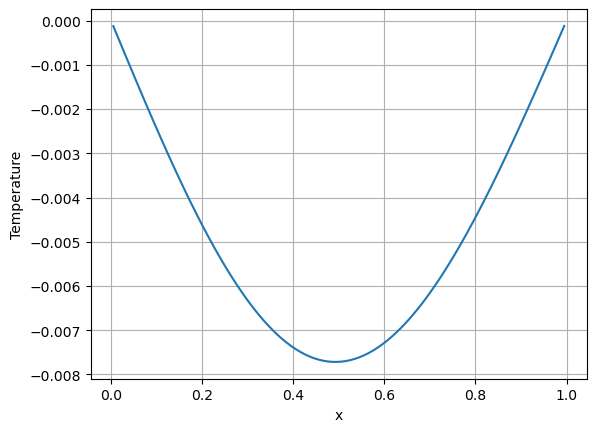

In [5]:
# Plot the result at time t
plt.plot(cell_centers, results[20].value)
plt.xlabel('x')
plt.ylabel('Temperature')
plt.grid(True)
plt.show()

In [6]:
results_array = np.array(results)
print(results_array[0])

[-0.00311972 -0.00934087 -0.01550992 -0.02159656 -0.02757366 -0.03341695
 -0.03910482 -0.04461806 -0.04993967 -0.05505465 -0.05994986 -0.06461385
 -0.06903673 -0.07321004 -0.07712663 -0.08078057 -0.08416703 -0.08728226
 -0.09012343 -0.09268862 -0.09497674 -0.09698746 -0.09872119 -0.10017901
 -0.10136261 -0.10227432 -0.10291698 -0.103294   -0.10340926 -0.10326715
 -0.10287247 -0.10223048 -0.10134684 -0.1002276  -0.09887919 -0.0973084
 -0.09552238 -0.09352859 -0.09133483 -0.08894922 -0.08638015 -0.08363635
 -0.0807268  -0.07766076 -0.07444777 -0.07109761 -0.06762034 -0.06402624
 -0.06032584 -0.05652988 -0.05264936 -0.04869545 -0.04467955 -0.04061325
 -0.03650834 -0.03237677 -0.02823068 -0.02408235 -0.01994421 -0.01582884
 -0.01174891 -0.00771724 -0.00374669  0.00014977  0.00395913  0.00766835
  0.01126437  0.01473417  0.01806476  0.02124321  0.02425673  0.02709265
  0.0297385   0.03218206  0.03441137  0.03641483  0.03818121  0.03969979
  0.04096037  0.04195339  0.04267     0.04310217  0.